# Worksheet 12

Name: Mark Yang

UID: U27016194

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Classification
2. Not classification (unless you've discritized it into a finite number of months)
3. Not classification (unless you're treating each rating as a non-relational category)
4. Not classification (unless you're going about it weird)

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

We can perform a test/train(/validation) split, where we split the dataset beforehand into disjoing sets of data to train, test, and validate the model.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting is when the model is too biased - that is when the model has an misconception that causes it to miss relevant features and relations of the data.

Overfitting is when the model is too varianced - that is when the model uses relationships that are overly specific and do not generalize, i.e. having increased variance on unseen data.

### K Nearest Neighbors

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

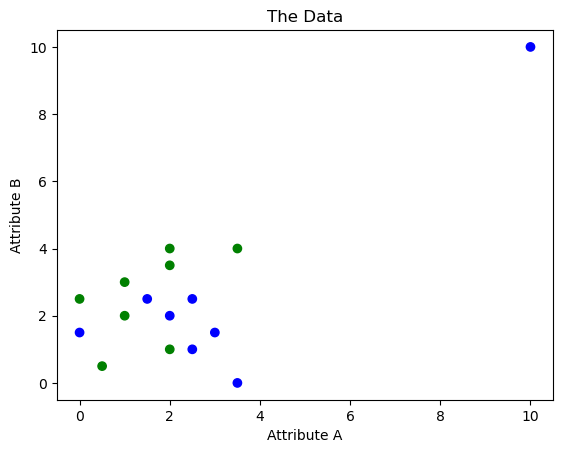

In [33]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.title("The Data")
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

There is a clear outlier at (10,10) in the data

In [34]:
del data["Attribute A"][-1]
del data["Attribute B"][-1]
del data["Class"][-1]

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

The blue point at (0, 1.5) can be considered a noise point

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

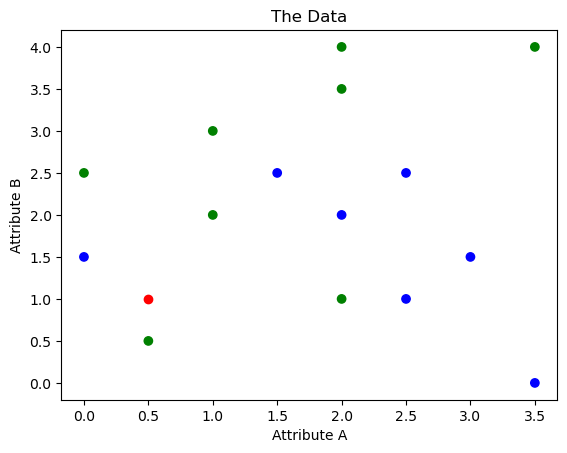

In [46]:
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter([0.5], [1.], color=colors[[2]].tolist())
plt.title("The Data")
plt.xlabel("Attribute A")
plt.ylabel("Attribute B")
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

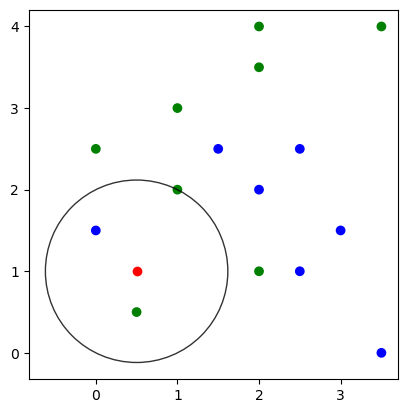

In [49]:
def n_closest_to(data, example, n):
    #data is tuple ([x], [y])
    #example is tuple (x,y)
    
    dx = [example[0] - x for x in data[0]]
    dy = [example[1] - x for x in data[1]]
    d = [x**2 + y**2 for x, y in zip(dx, dy)]
    
    arg_closest = np.argsort(d)[:3]
    radius = np.max([d[x] for x in arg_closest]) ** 0.5
    return arg_closest, radius

location = ( 0.5 , 1. )
_, radius = n_closest_to((data["Attribute A"], data["Attribute B"]), location, 3)
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter([0.5], [1.], color=colors[[2]].tolist())
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [50]:
def majority(c, points):
    classes = [c[x] for x in points]
    value, counts = np.unique(classes, return_counts=True)
    return value[np.argsort(counts)[-1]]

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [56]:
n = len(data["Class"])
count = 0
for i in range(n):
    actual_class = data["Class"][i]
    xs = data["Attribute A"][:i] + data["Attribute A"][i+1:]
    ys = data["Attribute B"][:i] + data["Attribute B"][i+1:]
    cs = data["Class"][:i] + data["Class"][i+1:]
    point = (data["Attribute A"][i],data["Attribute B"][i])
    training_set = (xs,ys)
    closest, _ = n_closest_to(training_set, point, 3)
    prediction = majority(cs, closest)
    if prediction == actual_class:
        count += 1

print("overall accuracy = {:.3f}".format(count/n))

overall accuracy = 0.733


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

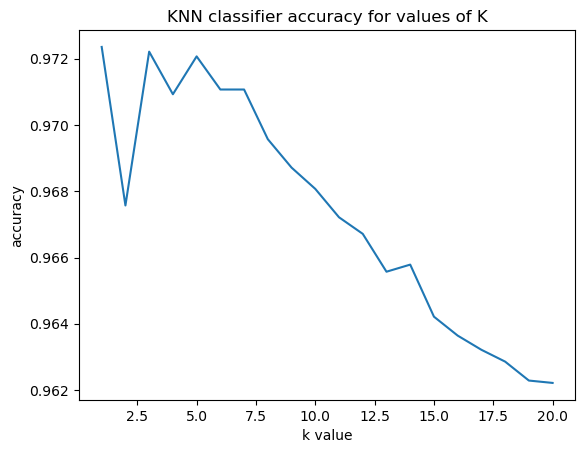

In [65]:
from sklearn.neighbors import KNeighborsClassifier

ks = range(1,21)
accuracies = []
models = []
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    predictions = neigh.predict(X_test)
    accuracy = np.sum(predictions == y_test)/len(y_test)
    models.append(neigh)
    accuracies.append(accuracy)

plt.plot(ks, accuracies)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.title("KNN classifier accuracy for values of K")
plt.show()

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

<function matplotlib.pyplot.show(close=None, block=None)>

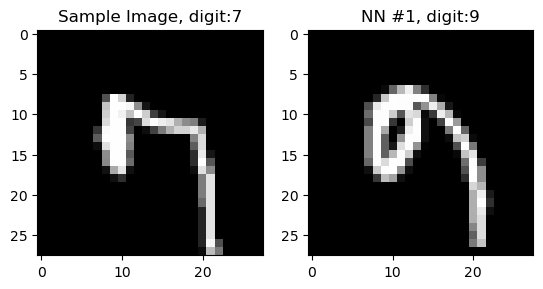

In [94]:
best_k = np.argmax(accuracies) + 1
best_model = models[best_k]

image = X_test[42]
image_y = y_test[42]

neighbors = best_model.kneighbors([image], n_neighbors=best_k)
neighbors = neighbors[1]

plt.subplot(1, best_k+1, 1)
plt.imshow(image.reshape((28,28)), cmap='gray')
plt.title("Sample Image, digit:{}".format(image_y))
for i,neigh in enumerate(neighbors):
    plt.subplot(1, best_k+1, 2 + i)
    plt.imshow(X_train[neigh].reshape((28,28)), cmap='gray')
    plt.title("NN #{}, digit:{}".format(i+1, y_train[neigh][0]))
    
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

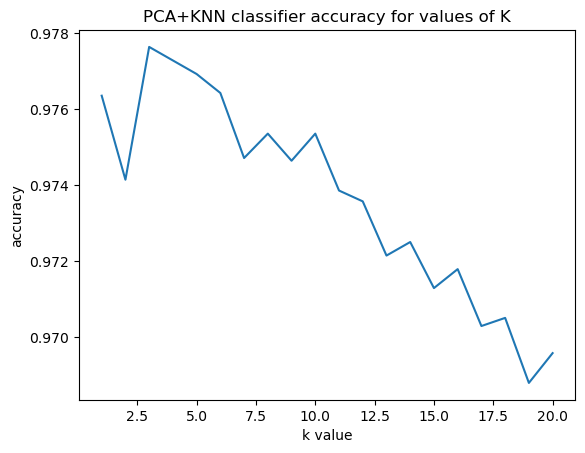

In [100]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

dimensionality_reduction = PCA(n_components=0.8,svd_solver='full')

ks = range(1,21)
accuracies = []
models = []
for k in ks:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    model = make_pipeline(dimensionality_reduction, knn_model)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    accuracy = np.sum(predictions == y_test)/len(y_test)
    models.append(neigh)
    accuracies.append(accuracy)

plt.plot(ks, accuracies)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.title("PCA+KNN classifier accuracy for values of K")
plt.show()

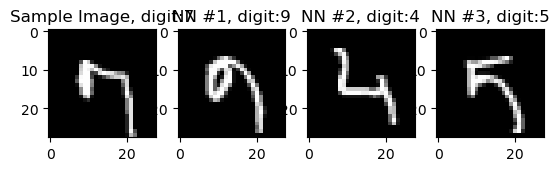

In [106]:
best_k = np.argmax(accuracies) + 1
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

image = X_test[42]
image_y = y_test[42]

neighbors = model.kneighbors([image], n_neighbors=best_k)
neighbors = neighbors[1][0]

plt.subplot(1, best_k+1, 1)
plt.imshow(image.reshape((28,28)), cmap='gray')
plt.title("Sample Image, digit:{}".format(image_y))
for i,neigh in enumerate(neighbors):
    plt.subplot(1, best_k+1, 2 + i)
    plt.imshow(X_train[neigh].reshape((28,28)), cmap='gray')
    plt.title("NN #{}, digit:{}".format(i+1, y_train[neigh][0]))
    
plt.show()

Here, instead of using a fixed dimension I used sklearn's svd_solver='full' argument to automatically choose a dimension based on a percentage of variance, e.g. here I set 80% variance, so enough features were chosen so 80% of the data's variance is explained by the chosen dimension. I chose 80% because it is almost all the information but excludes the 'tail' of low variance dimensions. 

After applying dimensionality reduction, the performance of the model improved, with the maximum accuracy acheived going from just over 97.2% up to over 97.7%. I think this improvement is attributed to removing 'noise' dimensions, thus reducing model overfitting. 

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [ ]:
# A solution only using a KNN classifier
# For a CS506 class assignment
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
train_df.head()

#First added feature: normalized fare
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].mean())
test_df["Fare"] = test_df["Fare"].fillna(train_df["Fare"].mean())
train_df["fare_norm"] = (train_df["Fare"] - train_df["Fare"].mean())/train_df["Fare"].std()
test_df["fare_norm"] = (test_df["Fare"] - train_df["Fare"].mean())/train_df["Fare"].std()

#Second added feature: normalized age
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(train_df["Age"].mean())
train_df["age_norm"] = (train_df["Age"] - train_df["Age"].mean())/train_df["Age"].std()
test_df["age_norm"] = (test_df["Age"] - train_df["Age"].mean())/train_df["Age"].std()

#Third added feature: is_single (1 if no sibling, spouse, children, or parent)
train_df["SibSp"] = train_df["SibSp"].fillna(0)
train_df["Parch"] = train_df["Parch"].fillna(0)
test_df["SibSp"] = test_df["SibSp"].fillna(0)
test_df["Parch"] = test_df["Parch"].fillna(0)
train_df["is_single"] = (train_df["SibSp"] == 0) & (train_df["Parch"] == 0)
test_df["is_single"] = (test_df["SibSp"] == 0) & (test_df["Parch"] == 0)


#3.5 added feature: is_single (1 if no sibling, spouse, children, or parent)
train_df["family_size"] = (train_df["SibSp"] + train_df["Parch"])
train_df["family_size"] = train_df["family_size"]/train_df["family_size"].mean()
test_df["family_size"] = (test_df["SibSp"] + test_df["Parch"])
test_df["family_size"] = test_df["family_size"]/test_df["family_size"].mean()

#Fourth added feature: sex (1 if male, 0 otherwise)
train_df["sex2"] = train_df["Sex"] == 'male'
test_df["sex2"] = test_df["Sex"] == 'male'

y_train = train_df['Survived']

# Used features: Normalized fare, normalized age, is_single, sex, pclass
X_train = train_df[["fare_norm", "age_norm", "is_single", "sex2", "Pclass", "family_size"]].to_numpy()
X_test = test_df[["fare_norm", "age_norm", "is_single", "sex2", "Pclass", "family_size"]].to_numpy()

model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

test_df["Survived"] = predictions.tolist()
test_df[["PassengerId", "Survived"]].to_csv('submission.csv', index=False)

Kaggle link: https://www.kaggle.com/markyang90/knn-only

The two features I decided to add were is_single and family_size. These two features are both based on the SibSp and Parch features, and describe the number of related family members. I decided to add these columns as I think family size is correlated with survival, i.e. people with more family might survive more, but at the same time people alone might survive more because they don't have to sacrifice their family or etc. 

I chose the K using the naive method of plotting serveral values and seeing which one performed the best

The accuracy at the end is pretty bad, 76% accuracy.